In [1]:
# # Install library terlebih dahulu (jalankan di Colab/terminal)
# !pip install vaderSentiment

# Import library
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Baca file
df = pd.read_csv("redmi6.csv", encoding="ISO-8859-1")

# Salin data
df_nlp = df.copy()

# Ekstrak angka rating
df_nlp['Rating_num'] = df_nlp['Rating'].str.extract(r'(\d\.?\d?)').astype(float)

# Mapping rating ke label
def label_from_rating(rating):
    if rating <= 2.0:
        return "negative"
    elif rating == 3.0:
        return "neutral"
    else:
        return "positive"

df_nlp['rating_label'] = df_nlp['Rating_num'].apply(label_from_rating)

# Gunakan VADER untuk mendapatkan skor dan label
analyzer = SentimentIntensityAnalyzer()

def get_vader_score(text):
    if isinstance(text, str):
        return analyzer.polarity_scores(text)['compound']
    return 0.0

def label_from_vader(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

df_nlp['vader_score'] = df_nlp['Comments'].apply(get_vader_score)
df_nlp['vader_label'] = df_nlp['vader_score'].apply(label_from_vader)

# Tampilkan hasil
print(df_nlp[['Comments', 'Rating_num', 'rating_label', 'vader_score', 'vader_label']].head(10))



                                            Comments  Rating_num rating_label  \
0  Another Midrange killer Smartphone by Xiaomi\n...         4.0     positive   
1                   All ok but vry small size mobile         3.0      neutral   
2                                         Quite good         3.0      neutral   
3  Redmi has always have been the the king of bud...         5.0     positive   
4  worst product from MI. I am a hardcore fan of ...         2.0     negative   
5  Over prised by at least around Rs.1000/- Low l...         3.0      neutral   
6  Pros:\nnotch display\nDual camera\nFace unlock...         4.0     positive   
7          Front camera is poor rest things are good         4.0     positive   
8                                               Wooo         5.0     positive   
9  Realme is sub brand of oppo\nHe give money to ...         5.0     positive   

   vader_score vader_label  
0       0.9984    positive  
1       0.1531    positive  
2       0.4927    pos

In [2]:
df_nlp

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,Rating_num,rating_label,vader_score,vader_label
0,Another Midrange killer Smartphone by Xiaomi,Rishikumar Thakur,4.0 out of 5 stars,on 1 October 2018,Display,Another Midrange killer Smartphone by Xiaomi\n...,,4.0,positive,0.9984,positive
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,3.0,neutral,0.1531,positive
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,3.0,neutral,0.4927,positive
3,Value for Money,Amazon Customer,5.0 out of 5 stars,on 28 September 2018,Display,Redmi has always have been the the king of bud...,2 people found this helpful,5.0,positive,0.9610,positive
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of ...,6 people found this helpful,2.0,negative,-0.7677,negative
...,...,...,...,...,...,...,...,...,...,...,...
275,"Cemera quality,face unlock most important in t...",Rahul,5.0 out of 5 stars,on 19 September 2018,Others,"I like This Phone, Awesome look and design.\nI...",NaN,5.0,positive,0.7650,positive
276,Mi is best phone,Sunil Soni,4.0 out of 5 stars,on 18 September 2018,Others,Product is avasome but invoice is note include...,NaN,4.0,positive,0.0000,neutral
277,Its a OK Phone,D.C.Padhi,3.0 out of 5 stars,on 15 September 2018,Battery,"Redmi Note4, Note5, now 6pro..It seems the old...",NaN,3.0,neutral,0.0179,neutral
278,Redmi,Mahesh,5.0 out of 5 stars,on 21 September 2018,Others,I love mi,NaN,5.0,positive,0.6369,positive


# 2nd Analysis (rating label data target + preprocessing)

In [3]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Inisialisasi
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Fungsi bersih-bersih teks
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Hapus simbol & angka
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]  # Hapus stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return ' '.join(tokens)

# Terapkan
df_nlp['Comments_clean'] = df_nlp['Comments'].apply(clean_text)

# Cek hasil
df_nlp[['Comments', 'Comments_clean']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,Comments,Comments_clean
0,Another Midrange killer Smartphone by Xiaomi\n...,another midrange killer smartphone xiaomi majo...
1,All ok but vry small size mobile,ok vry small size mobile
2,Quite good,quite good
3,Redmi has always have been the the king of bud...,redmi always king budget segmentand yet anothe...
4,worst product from MI. I am a hardcore fan of ...,worst product mi hardcore fan mi one really di...


# Model NLP FIX

In [4]:
df_bert = df_nlp[['Comments_clean', 'rating_label']].dropna()
df_bert = df_bert.rename(columns={'Comments_clean': 'text', 'rating_label': 'label'})
df_bert.to_csv("bert_training_data.csv", index=False)


In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from scipy.sparse import hstack

# Unduh VADER lexicon jika belum
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# 1. Load data
df = df_nlp[['Comments', 'rating_label']].dropna()
df['Comments'] = df['Comments'].astype(str)

# 2. Tambahkan fitur VADER compound score
df['vader_score'] = df['Comments'].apply(lambda x: sia.polarity_scores(x)['compound'])

# 3. Encode label
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['rating_label'])

# 4. TF-IDF vectorization
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(df['Comments'])

# 5. Gabungkan TF-IDF + VADER score
X_vader = df['vader_score'].values.reshape(-1, 1)
X_combined = hstack([X_tfidf, X_vader])
y = df['label_encoded']

# 6. Oversampling minoritas saja
ros = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_combined, y)

# 7. Split data train/test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 8. Latih model
clf = LinearSVC(class_weight='balanced')
clf.fit(X_train, y_train)

# 9. Evaluasi model di data hasil oversampling
print("Evaluasi pada data oversampled:")
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 10. Evaluasi model di data asli (tanpa balancing)
X_real = hstack([tfidf.transform(df['Comments']), df['vader_score'].values.reshape(-1,1)])
y_real = df['label_encoded']
y_real_pred = clf.predict(X_real)
print("\nEvaluasi pada data asli:")
print(classification_report(y_real, y_real_pred, target_names=le.classes_))




Evaluasi pada data oversampled:
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89        37
     neutral       1.00      0.97      0.99        40
    positive       0.95      0.82      0.88        44

    accuracy                           0.92       121
   macro avg       0.92      0.92      0.92       121
weighted avg       0.93      0.92      0.92       121


Evaluasi pada data asli:
              precision    recall  f1-score   support

    negative       0.85      0.98      0.91        52
     neutral       0.96      0.96      0.96        27
    positive       0.99      0.95      0.97       201

    accuracy                           0.96       280
   macro avg       0.93      0.96      0.95       280
weighted avg       0.96      0.96      0.96       280



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\71487\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# 11. Uji manual
def predict_sentiment(text):
    tfidf_vec = tfidf.transform([text])
    vader_val = np.array([sia.polarity_scores(text)['compound']]).reshape(-1, 1)
    combined = hstack([tfidf_vec, vader_val])
    pred = clf.predict(combined)[0]
    return le.inverse_transform([pred])[0]

test_texts = [
    "I love this phone! Very fast and smooth.",
    "This is the worst product I’ve ever used.",
    "Okay lah, not bad, not great.",
    "The display broke after 1 week.",
    "Super value for money!",
    "I'm disappointed with the performance.",
    "The camera is decent, nothing special.",
    "Totally worth every penny!",
    'Average', 'Poor performance','All good'
]

for text in test_texts:
    print(f"Input: {text}\n→ Prediction: {predict_sentiment(text)}\n")

Input: I love this phone! Very fast and smooth.
→ Prediction: positive

Input: This is the worst product I’ve ever used.
→ Prediction: negative

Input: Okay lah, not bad, not great.
→ Prediction: positive

Input: The display broke after 1 week.
→ Prediction: negative

Input: Super value for money!
→ Prediction: positive

Input: I'm disappointed with the performance.
→ Prediction: negative

Input: The camera is decent, nothing special.
→ Prediction: negative

Input: Totally worth every penny!
→ Prediction: positive

Input: Average
→ Prediction: neutral

Input: Poor performance
→ Prediction: neutral

Input: All good
→ Prediction: positive

Input: this device is shit
→ Prediction: negative



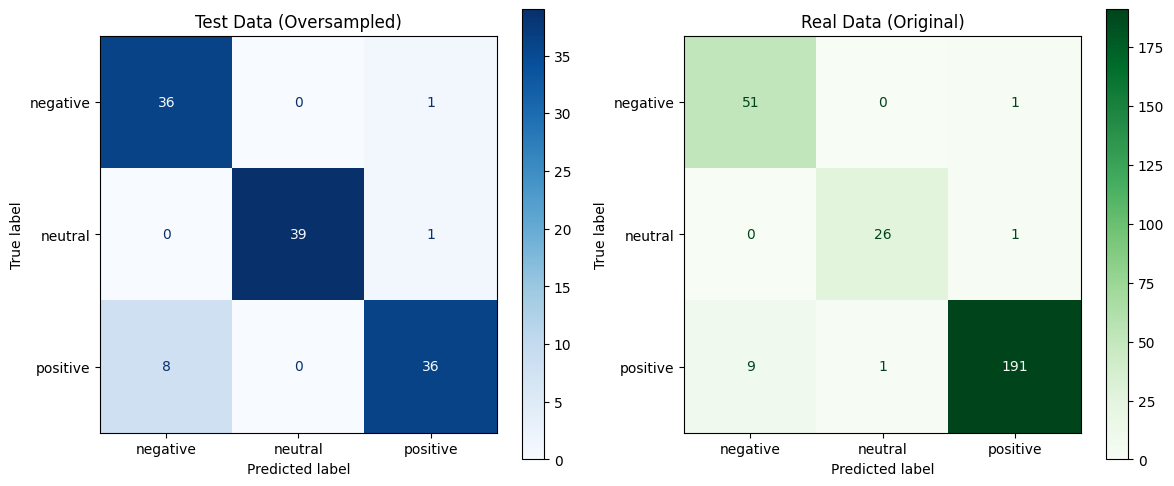

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# A. Confusion Matrix - Test Set Oversampled
cm1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=le.classes_)
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title("Test Data (Oversampled)")

# B. Confusion Matrix - Real Data
cm2 = confusion_matrix(y_real, y_real_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=le.classes_)
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title("Real Data (Original)")

plt.tight_layout()
plt.show()


In [56]:
# Pastikan df memiliki kolom 'vader_score' terlebih dahulu
def vader_label_from_score(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Buat ulang kolom vader_label
df['vader_label'] = df['vader_score'].apply(vader_label_from_score)

# 1. Ambil data yang vader_label ≠ rating_label
mismatch_df = df[df['vader_label'] != df['rating_label']].copy()

# 2. Transformasi TF-IDF dan tambahkan vader_score sebagai fitur
X_mismatch = hstack([
    tfidf.transform(mismatch_df['Comments']),
    mismatch_df['vader_score'].values.reshape(-1, 1)
])

# 3. Prediksi dengan model NLP yang sudah dilatih
mismatch_df['predicted_label'] = clf.predict(X_mismatch)
mismatch_df['predicted_label'] = le.inverse_transform(mismatch_df['predicted_label'])

# 4. Evaluasi performa model terhadap rating_label (benchmark)
from sklearn.metrics import classification_report
print(classification_report(
    mismatch_df['rating_label'],
    mismatch_df['predicted_label']
))

              precision    recall  f1-score   support

    negative       0.75      0.96      0.84        28
     neutral       1.00      0.96      0.98        24
    positive       0.89      0.65      0.76        26

    accuracy                           0.86        78
   macro avg       0.88      0.86      0.86        78
weighted avg       0.88      0.86      0.86        78



In [57]:
# Ambil kembali subset anomali
mismatch_df = df[df['vader_label'] != df['rating_label']].copy()

# Transform fitur
X_mismatch = hstack([
    tfidf.transform(mismatch_df['Comments']),
    mismatch_df['vader_score'].values.reshape(-1, 1)
])

# Prediksi dari model kamu
mismatch_df['predicted_label'] = clf.predict(X_mismatch)
mismatch_df['predicted_label'] = le.inverse_transform(mismatch_df['predicted_label'])

# Kolom tambahan untuk membandingkan
mismatch_df['match_with_rating'] = mismatch_df['predicted_label'] == mismatch_df['rating_label']

# Ambil contoh acak (atau kamu bisa ganti jadi .head())
sample = mismatch_df[['Comments', 'rating_label', 'vader_label', 'predicted_label', 'match_with_rating']].sample(10)

# Tampilkan
pd.set_option('display.max_colwidth', None)
print(sample)


                                                                                                                                                                                                                                                                                                                                                                                                                                                               Comments  \
222                                                       good rear camera and bad front camera but software problem so cant connect to camera error comes on startup of camera!\nFar better than asus zenfone max pro m1.\nNow feeling the Sony camera quality.\nFront camera is wow (5mp) still taking better than 13mp pics\nI am using this phone as a pro photographer now\nWait for one month and you will get 1000/- off on it.\nThanks amazon\nThanks Mi India.   
145                                                                               

In [59]:
df

Comments  \
0    Another Midrange killer Smartphone by Xiaomi\n\nMajor Highlights:\n The Redmi 6 Pro sports a 5.84-inch full-HD+ display with a notch\n Powered by the Qualcomm Snapdragon 625 SoC\n The phone is priced at Rs. 10,999 for the 3GB RAM variant (Start Point)\n Battery of 4000 mAh and its Durability\n The Tripple Slots\n Dual AI Camera\n\nWell in Redmi 6 Series you will get 3 Different Smartphones with different specs, and from all of them, Redmi 6 pro is most powerful and advanced (as said by Redmi India in their launch event).\n\nXiaomi Redmi 6 Pro design:\nBeing the most premium phone of the new Redmi 6 family, the Redmi 6 Pro has been given somewhat better materials, in the form of a metal backplate. However, the overall design isnt too different from what weve already seen from Xiaomi at around this price point. This is a fairly thick phone, and it's a bit hefty too, but its manageable. The buttons have good feedback without being noisy, and on the left side, you get a single tray which can hold two SIM cards and a separate microSD card. Something worth noting is that the Redmi 6 Pro does not support dual 4G VoLTE, which means that only one SIM can connect to a 4G network at a time, The placement of ports is good. The mono speaker is on the bottom right, so chances of blocking it when using the phone in landscape mode are slim. The headphone socket is placed on the top, and you also get an infrared (IR) emitter which can be used to control IR appliances through the Mi Remote app.\n\nXiaomi Redmi 6 Pro specifications and software:\nThe phone uses Qualcomms Snapdragon 625 SoC, which is a couple of years old now but is still a capable chip for general tasks. Gaming performance isnt great, as some popular games like PUBG, and asphalt default to the lowest graphics settings, and even then, gameplay isnt smooth. Our unit was running on a pre-release version of its MIUI software, which prevented us from running most benchmarks.\n\nStorage Options:\nWell I am impressed with the Xiaomi as they provided triple Slot in sim tray (2 for nano sim & one for SD card)\n\nHeating Issues:\nWell, I do not find any heating issues in this phone while playing games like PubG and Asphalt.\n\nCamera in Redmi 6 pro:\nThe rear 12-megapixel camera has a f/2.2 aperture with PDAF. Autofocus was decently quick in good light. Theres auto-HDR, which did a good job of balancing the exposure in our experience. We observed good detail in landscape shots in daylight, and colours were pleasing too. The main sensor stumbled a bit with macros, as it simply wasn't able to resolve finer detail. The white balance was a bit of a hit or a miss in close-ups, and we often found ourselves having to tap-to-focus to get the white balance back on track. Saving HDR images takes a good couple of seconds in daylight. I would be very happy if they have provided the Flash in Portrait Mode, still, you can Tap on Torch icon to switch, on the torch, you will get the flash in Portrait Mode.\n\nBattery in Redmi 6 Pro:\nBattery life is one of the strong suits of the Redmi 6 Pro. The 4000mAh battery easily lasted us a full day and a bit more on one charge. Playing heavy games didn't drain the battery too much either. In a single round of PUBG (around 30 minutes), in which we survived till the very end, we recorded a drop of around seven percent, which is not bad. In our internal video loop test, we got a runtime of 16 hours and 45 minutes, which is very good. The Redmi 6 Pro doesnt support fast charging, but the bundled 10W adapter gave us roughly a 55 percent charge in an hour, and it took us roughly 2 hours and 35 minutes to charge it completely from zero\nWell before buying this phone I have heard many issues regarding inbuilt Advertisement in Xiaomi devices, and I checked that too in my previous Xiaomi phone which I am using since 2 Years. And actually, I found inbuilt ads in those phones. You will see ads in inbuilt developers apps like MI Apps, Mi Music, 

# Useful Comments

In [64]:
import pandas as pd

# Ganti path dengan path ke file CSV kamu
df = pd.read_csv('redmi6.csv',encoding='ISO-8859-1')  # atau file terbaru yang kamu pakai
print(df.columns)  # Cek kolom apa saja yang tersedia


Index(['Review Title', 'Customer name', 'Rating', 'Date', 'Category',
       'Comments', 'Useful'],
      dtype='object')


In [66]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi VADER
analyzer = SentimentIntensityAnalyzer()

# Hitung skor VADER dan label
df['vader_score'] = df['Comments'].astype(str).apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['vader_label'] = df['vader_score'].apply(
    lambda x: 'positive' if x > 0.05 else ('negative' if x < -0.05 else 'neutral')
)

# Label dari rating angka → rating_label (benchmark manual)
df['rating_label'] = df['Rating'].astype(str).str[0].astype(int).apply(
    lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral')
)


In [69]:
# Pastikan kolomnya string
df['Useful'] = df['Useful'].astype(str)

# Ekstrak angka pertama dari string, misalnya '7 people found this helpful' → 7
import re
df['useful_votes'] = df['Useful'].apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)


In [72]:
# Ambil 20 komentar paling dianggap berguna
top_useful = df.sort_values(by='useful_votes', ascending=False).head(20).copy()
top_useful

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,vader_score,vader_label,rating_label,useful_votes
242,Best phone forever.,Manish Singh,5.0 out of 5 stars,on 18 September 2018,Others,Best phone with face unlock full hd video recording and all latest features.,20 people found this helpful,0.6369,positive,positive,20
225,Camera not good,rohan sulgekar,1.0 out of 5 stars,on 17 September 2018,Others,Not good photo crirati,11 people found this helpful,-0.3412,negative,negative,11
220,#Horrible experience of Redmi 6pro - Readon to know more##,Bhaskar Shanmugam,1.0 out of 5 stars,on 17 September 2018,Camera,"Please don't buy!!\n\nHorrible phone from Xiaomi!!\n\nThe phone is just for people who like showing off the new iPhone notch design. The phone uses an outdated processor and lags terrible in term of performance. When we use more than 4apps at a time, the phone will get hanged and you will be forced to restart the phone. Watching videos for more than 20mins the phone gets extrmely heated and you will have to put it to stanby fir a while before resarting the use of the phone. Very bad multi-tasking. The build quality is okay, but not as good as other budget phone. A flat drop on the front screen side if hit hardly will crack the screen. The front camera is extremely poor and has been downgraded and doesn't produce even a decent quality picture. Selfie lovers, please don't even buy this phone you will get a heart ache after looking at your pix. The rear camera picture quality is average and is very unlike of xiaomi.\n\nOn the other side, the basic things like the output from the speaker phone and and the earphone are extremely poor and distorted...\n\nThe only con is a decent screen, however that is contributed by low quality video while played in amazon or netflix..\n\nHad complained to Amazon on the above low quality issues, unfortunately Amazon is not willing to listen, they are saying technically the phone is working and hence it can't taken back.. Unfortunately, in this case Amazon has put its sellers over it buyers who are their bread and butter. Hope Amazon listens to my complaint here and takes measures to improve their service... Just to put things into perspective, an average 6-7k phone is sold at an extremely abnoxiously at a high price of 11k. You can find many better phone at this high price. Please stop buying this phone. Thanks for reading. Extremely sadened on buying this phone...",10 people found this helpful,0.8679,positive,negative,10
223,Worst Camera,Pawan Dwivedee,2.0 out of 5 stars,on 18 September 2018,Camera,"Front camera of this phone is like a VGA camera, having very noisy effect. I recommend that please don't buy this phone.",10 people found this helpful,0.6494,positive,negative,10
224,This mobile is defective,Anand harsh,1.0 out of 5 stars,on 18 September 2018,Display,"I say this product is very defective camera is not working proper and speed is very slow and company. Refunding my money the amazon customers care representative ,s behavior is very bad there is option of return on display the amazon company,s app but not return this product so I request to all customers be care full",8 people found this helpful,0.5584,positive,negative,8
1,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,0.1531,positive,neutral,7
2,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,0.4927,positive,neutral,7
12,Full display not working in all application.,Vaibhav Patel,3.0 out of 5 stars,on 18 September 2018,Others,Quite good,7 people found this helpful,0.4927,positive,neutral,7
11,vry small size mobile,Raza ji,3.0 out of 5 stars,on 15 September 2018,Others,All ok but vry small size mobile,7 people found this helpful,0.1531,positive,neutral,7
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 20

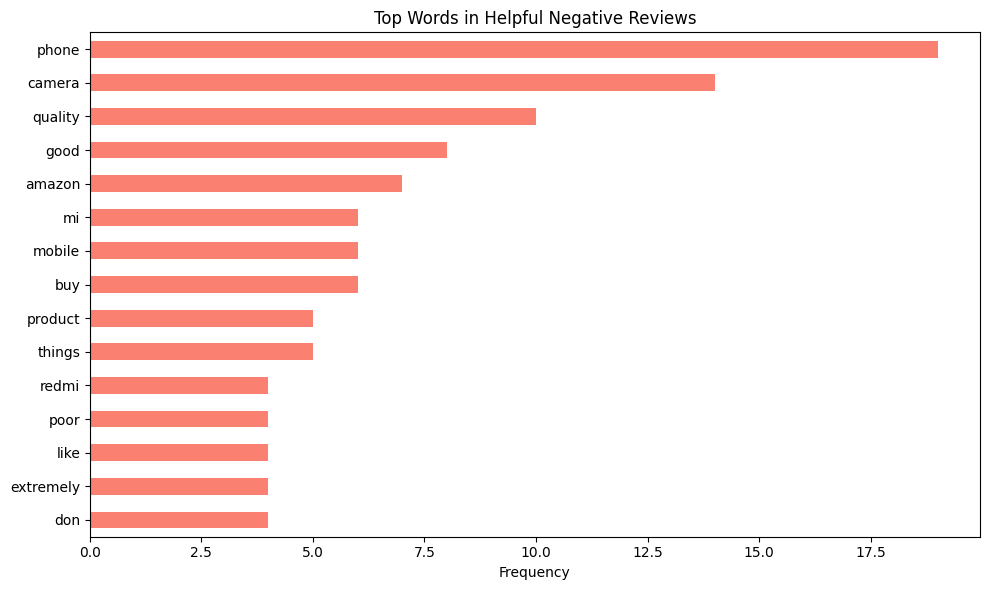

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re

# Ambil komentar yang dianggap berguna
df['useful_votes'] = df['Useful'].astype(str).str.extract(r'(\d+)').astype(float)

# Ambil 50 komentar dengan vote tertinggi
top_useful = df.sort_values(by='useful_votes', ascending=False).head(50)

# Filter hanya yang label negatif
neg_useful = top_useful[
    (top_useful['rating_label'] == 'negative') | (top_useful['vader_label'] == 'negative')
].copy()

# Gabungkan dan bersihkan komentar
neg_useful['Comments'] = neg_useful['Comments'].fillna("").astype(str)
text_data = neg_useful['Comments'].tolist()

# Vectorizer (ambil kata yang sering muncul)
vectorizer = CountVectorizer(stop_words='english', max_features=15)
X = vectorizer.fit_transform(text_data)

# Hitung frekuensi kata
word_freq = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
word_freq = word_freq.sort_values(ascending=True)  # supaya plot naik ke atas

# Plot
plt.figure(figsize=(10, 6))
word_freq.plot(kind='barh', color='salmon')
plt.title("Top Words in Helpful Negative Reviews")
plt.xlabel("Frequency")
plt.tight_layout()
plt.show()


In [85]:
neg_useful

,Review Title,Customer name,Rating,Date,Category,Comments,Useful,vader_score,vader_label,rating_label,useful_votes
225,Camera not good,rohan sulgekar,1.0 out of 5 stars,on 17 September 2018,Others,Not good photo crirati,11 people found this helpful,-0.3412,negative,negative,11.0
223,Worst Camera,Pawan Dwivedee,2.0 out of 5 stars,on 18 September 2018,Camera,"Front camera of this phone is like a VGA camera, having very noisy effect. I recommend that please don't buy this phone.",10 people found this helpful,0.6494,positive,negative,10.0
220,#Horrible experience of Redmi 6pro - Readon to know more##,Bhaskar Shanmugam,1.0 out of 5 stars,on 17 September 2018,Camera,"Please don't buy!!\n\nHorrible phone from Xiaomi!!\n\nThe phone is just for people who like showing off the new iPhone notch design. The phone uses an outdated processor and lags terrible in term of performance. When we use more than 4apps at a time, the phone will get hanged and you will be forced to restart the phone. Watching videos for more than 20mins the phone gets extrmely heated and you will have to put it to stanby fir a while before resarting the use of the phone. Very bad multi-tasking. The build quality is okay, but not as good as other budget phone. A flat drop on the front screen side if hit hardly will crack the screen. The front camera is extremely poor and has been downgraded and doesn't produce even a decent quality picture. Selfie lovers, please don't even buy this phone you will get a heart ache after looking at your pix. The rear camera picture quality is average and is very unlike of xiaomi.\n\nOn the other side, the basic things like the output from the speaker phone and and the earphone are extremely poor and distorted...\n\nThe only con is a decent screen, however that is contributed by low quality video while played in amazon or netflix..\n\nHad complained to Amazon on the above low quality issues, unfortunately Amazon is not willing to listen, they are saying technically the phone is working and hence it can't taken back.. Unfortunately, in this case Amazon has put its sellers over it buyers who are their bread and butter. Hope Amazon listens to my complaint here and takes measures to improve their service... Just to put things into perspective, an average 6-7k phone is sold at an extremely abnoxiously at a high price of 11k. You can find many better phone at this high price. Please stop buying this phone. Thanks for reading. Extremely sadened on buying this phone...",10 people found this helpful,0.8679,positive,negative,10.0
224,This mobile is defective,Anand harsh,1.0 out of 5 stars,on 18 September 2018,Display,"I say this product is very defective camera is not working proper and speed is very slow and company. Refunding my money the amazon customers care representative ,s behavior is very bad there is option of return on display the amazon company,s app but not return this product so I request to all customers be care full",8 people found this helpful,0.5584,positive,negative,8.0
4,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of MI. But this one really disappointing.,6 people found this helpful,-0.7677,negative,negative,6.0
14,Not worth for the money,Sudhakaran Wadakkancheri,2.0 out of 5 stars,on 18 September 2018,Others,worst product from MI. I am a hardcore fan of MI. But this one really disappointing.,6 people found this helpful,-0.7677,negative,negative,6.0
226,Not worth the money paid. Worst camera & screen size,Sreenath Bettanna,1.0 out of 5 stars,on 17 September 2018,Camera,Camera is too worst considering price of the phone. Front camera worst than other ordinary mobiles. Processor not that much fast than other 2 ghz speed mobiles of redmi. Notch is only for namesake and size sake. It's a big let down. Bought this phone considering notch option. But redmi disappointed here. Is redmi started thinking India as dump yard. Redmi Y2 is better op

In [86]:
neg_useful[['Review Title','Comments','Useful']]

,Review Title,Comments,Useful
225,Camera not good,Not good photo crirati,11 people found this helpful
223,Worst Camera,"Front camera of this phone is like a VGA camera, having very noisy effect. I recommend that please don't buy this phone.",10 people found this helpful
220,#Horrible experience of Redmi 6pro - Readon to know more##,"Please don't buy!!\n\nHorrible phone from Xiaomi!!\n\nThe phone is just for people who like showing off the new iPhone notch design. The phone uses an outdated processor and lags terrible in term of performance. When we use more than 4apps at a time, the phone will get hanged and you will be forced to restart the phone. Watching videos for more than 20mins the phone gets extrmely heated and you will have to put it to stanby fir a while before resarting the use of the phone. Very bad multi-tasking. The build quality is okay, but not as good as other budget phone. A flat drop on the front screen side if hit hardly will crack the screen. The front camera is extremely poor and has been downgraded and doesn't produce even a decent quality picture. Selfie lovers, please don't even buy this phone you will get a heart ache after looking at your pix. The rear camera picture quality is average and is very unlike of xiaomi.\n\nOn the other side, the basic things like the output from the speaker phone and and the earphone are extremely poor and distorted...\n\nThe only con is a decent screen, however that is contributed by low quality video while played in amazon or netflix..\n\nHad complained to Amazon on the above low quality issues, unfortunately Amazon is not willing to listen, they are saying technically the phone is working and hence it can't taken back.. Unfortunately, in this case Amazon has put its sellers over it buyers who are their bread and butter. Hope Amazon listens to my complaint here and takes measures to improve their service... Just to put things into perspective, an average 6-7k phone is sold at an extremely abnoxiously at a high price of 11k. You can find many better phone at this high price. Please stop buying this phone. Thanks for reading. Extremely sadened on buying this phone...",10 people found this helpful
224,This mobile is defective,"I say this product is very defective camera is not working proper and speed is very slow and company. Refunding my money the amazon customers care representative ,s behavior is very bad there is option of return on display the amazon company,s app but not return this product so I request to all customers be care full",8 people found this helpful
4,Not worth for the money,worst product from MI. I am a hardcore fan of MI. But this one really disappointing.,6 people found this helpful
14,Not worth for the money,worst product from MI. I am a hardcore fan of MI. But this one really disappointing.,6 people found this helpful
226,Not worth the money paid. Worst camera & screen size,Camera is too worst considering price of the phone. Front camera worst than other ordinary mobiles. Processor not that much fast than other 2 ghz speed mobiles of redmi. Notch is only for namesake and size sake. It's a big let down. Bought this phone considering notch option. But redmi disappointed here. Is redmi started thinking India as dump yard. Redmi Y2 is better option than this.,5 people found this helpful
17,Fantastic,Front camera is poor rest things are good,5 people found this helpful
7,Fantastic,Front camera is poor rest things are good,5 people found this helpful
27,Mi 6pro review,Camera clarity is not good and average mobile I purchased first time mi mobile but not good compare to expect,3 people found this helpful


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re

# Ambil komentar yang dianggap berguna
df['useful_votes'] = df['Useful'].astype(str).str.extract(r'(\d+)').astype(float)

# Ambil 50 komentar dengan vote tertinggi
top_useful = df.sort_values(by='useful_votes', ascending=False).head(50)

# Filter hanya yang label negatif
pos_useful = top_useful[
    (top_useful['rating_label'] == 'positive') | (top_useful['vader_label'] == 'positive')
].copy()

# Gabungkan dan bersihkan komentar
pos_useful['Comments'] = pos_useful['Comments'].fillna("").astype(str)
text_data = pos_useful['Comments'].tolist()

# # Vectorizer (ambil kata yang sering muncul)
# vectorizer = CountVectorizer(stop_words='english', max_features=15)
# X = vectorizer.fit_transform(text_data)

# # Hitung frekuensi kata
# word_freq = pd.Series(X.toarray().sum(axis=0), index=vectorizer.get_feature_names_out())
# word_freq = word_freq.sort_values(ascending=True)  # supaya plot naik ke atas

# # Plot
# plt.figure(figsize=(10, 6))
# word_freq.plot(kind='barh', color='salmon')
# plt.title("Top Words in Helpful Negative Reviews")
# plt.xlabel("Frequency")
# plt.tight_layout()
# plt.show()
pos_useful[['Review Title','Comments','Useful','rating_label']]


,Review Title,Comments,Useful,rating_label
242,Best phone forever.,Best phone with face unlock full hd video recording and all latest features.,20 people found this helpful,positive
223,Worst Camera,"Front camera of this phone is like a VGA camera, having very noisy effect. I recommend that please don't buy this phone.",10 people found this helpful,negative
220,#Horrible experience of Redmi 6pro - Readon to know more##,"Please don't buy!!\n\nHorrible phone from Xiaomi!!\n\nThe phone is just for people who like showing off the new iPhone notch design. The phone uses an outdated processor and lags terrible in term of performance. When we use more than 4apps at a time, the phone will get hanged and you will be forced to restart the phone. Watching videos for more than 20mins the phone gets extrmely heated and you will have to put it to stanby fir a while before resarting the use of the phone. Very bad multi-tasking. The build quality is okay, but not as good as other budget phone. A flat drop on the front screen side if hit hardly will crack the screen. The front camera is extremely poor and has been downgraded and doesn't produce even a decent quality picture. Selfie lovers, please don't even buy this phone you will get a heart ache after looking at your pix. The rear camera picture quality is average and is very unlike of xiaomi.\n\nOn the other side, the basic things like the output from the speaker phone and and the earphone are extremely poor and distorted...\n\nThe only con is a decent screen, however that is contributed by low quality video while played in amazon or netflix..\n\nHad complained to Amazon on the above low quality issues, unfortunately Amazon is not willing to listen, they are saying technically the phone is working and hence it can't taken back.. Unfortunately, in this case Amazon has put its sellers over it buyers who are their bread and butter. Hope Amazon listens to my complaint here and takes measures to improve their service... Just to put things into perspective, an average 6-7k phone is sold at an extremely abnoxiously at a high price of 11k. You can find many better phone at this high price. Please stop buying this phone. Thanks for reading. Extremely sadened on buying this phone...",10 people found this helpful,negative
224,This mobile is defective,"I say this product is very defective camera is not working proper and speed is very slow and company. Refunding my money the amazon customers care representative ,s behavior is very bad there is option of return on display the amazon company,s app but not return this product so I request to all customers be care full",8 people found this helpful,negative
2,Full display not working in all application.,Quite good,7 people found this helpful,neutral
1,vry small size mobile,All ok but vry small size mobile,7 people found this helpful,neutral
11,vry small size mobile,All ok but vry small size mobile,7 people found this helpful,neutral
12,Full display not working in all application.,Quite good,7 people found this helpful,neutral
8,Good,Wooo,5 people found this helpful,positive
17,Fantastic,Front camera is poor rest things are good,5 people found this helpful,positive


In [90]:
df2 = pd.read_csv('mi_data.csv')
df2.head()

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/p/g/k/-original-imageyuud3bey9hh.jpeg?q=70,Internal Storage128 GBRAM8 GBMemory Card Slot TypeDedicated Slot,Operating SystemAndroid 13Processor CoreOcta CorePrimary Clock Speed2.4 GHz,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/e/y/b/-original-imageftfzx8gfkys.jpeg?q=70,Internal Storage128 GBRAM8 GBMemory Card Slot TypeDedicated Slot,Operating SystemAndroid 13Processor CoreOcta CorePrimary Clock Speed2.4 GHz,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/j/z/h/-original-imag7gy6tzuz3hk8.jpeg?q=70,Internal Storage32 GBRAM2 GBMemory Card Slot TypeDedicated Slot,Operating SystemAndroid Q 10Processor CoreOcta CorePrimary Clock Speed2 GHz,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/x/i/8/-original-imag7chxqqu7h5hs.jpeg?q=70,Internal Storage32 GBRAM3 GBMemory Card Slot TypeDedicated Slot,Operating SystemAndroid Q 10Processor CoreOcta CorePrimary Clock Speed2 GHz,"Network Type4G VOLTE, 4GSupported Networks4G VoLTE",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/e/u/4/-original-imag7f6chqmz5hzd.jpeg?q=70,Internal Storage128 GBRAM6 GBExpandable Storage1 TBSupported Memory Card TypemicroSDMemory Card Slot TypeHybrid SlotCall Log MemoryYes,Operating SystemAndroid 11Processor TypeQualcomm Snapdragon 778GProcessor CoreOcta CorePrimary Clock Speed2.4 GHzSecondary Clock Speed1.8 GHz,"Network Type5G, 4G VOLTESupported Networks5G, 4G VoLTE, 4G LTEBluetooth SupportYesBluetooth Version5.1Wi-FiYesWi-Fi VersionWi-Fi 802.11 a/b/g/n/acWi-Fi HotspotYesInfraredYesMap SupportGoogle MapsGPS SupportYes",Battery Capacity4250 mAhBattery TypeLi-Po


In [16]:
df[df['Selling Price'] <= 5000]

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
22,GIONEE,Pioneer P4S,White,1 GB,8 GB,Yes,3.5,3499,3499,GIONEE Pioneer P4S,0,0.000000
36,SAMSUNG,Metro 313,Black,2 MB,2 MB,Yes,4.1,2399,2399,SAMSUNG Metro 313,0,0.000000
120,SAMSUNG,Guru Music 2,Black,NaN,2 MB,Yes,4.3,1625,1625,SAMSUNG Guru Music 2,0,0.000000
124,GIONEE,P5L,Black,1 GB,16 GB,Yes,3.7,3990,3990,GIONEE P5L,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3079,Nokia,108 Dual SIM,Black,4 MB,4 MB,Yes,4.2,1900,1900,Nokia 108 Dual SIM,0,0.000000
3092,Nokia,215 4G DS 2020,Black,64 MB,128 MB,Yes,3.7,3162,3299,Nokia 215 4G DS 2020,137,4.152774
3096,SAMSUNG,Metro 313 Dual Sim,Black,4 MB,2 MB,Yes,4.3,2340,2340,SAMSUNG Metro 313 Dual Sim,0,0.000000
3108,SAMSUNG,Metro 313,Black,4 MB,2 MB,Yes,4.2,2299,2299,SAMSUNG Metro 313,0,0.000000


C:\Users\71487\AppData\Local\Temp\ipykernel_28536\3523437124.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_rating_avg = df2.groupby('price_range')['ratings'].mean().reset_index()
C:\Users\71487\AppData\Local\Temp\ipykernel_28536\3523437124.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_rating_avg, x='price_range', y='ratings', palette='Blues_d')


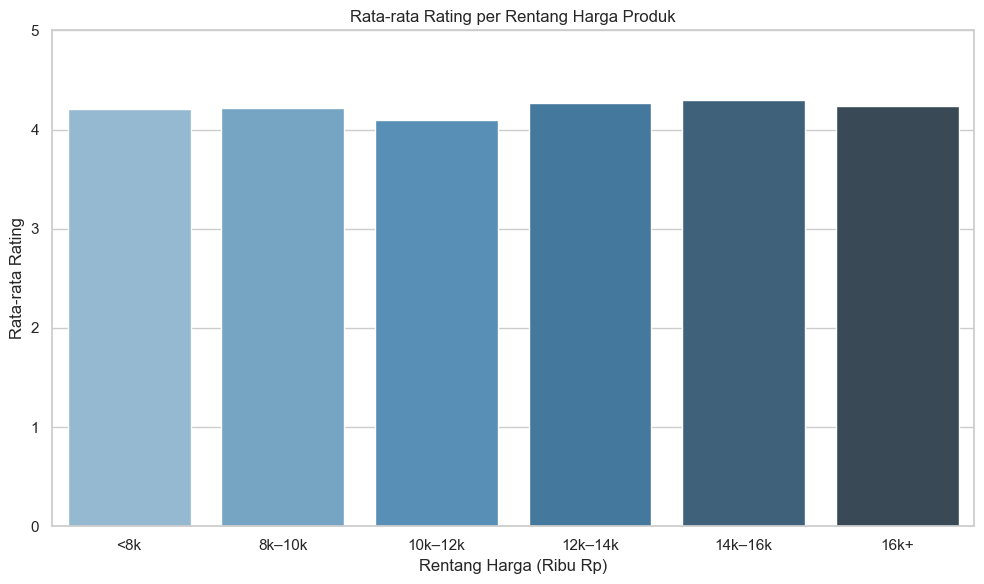

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df2 = pd.read_csv("mi_data.csv")

# Bersihkan harga
df2['price_clean'] = df2['price'].replace('[₹,]', '', regex=True).astype(int)

# Bikin rentang harga
df2['price_range'] = pd.cut(
    df2['price_clean'],
    bins=[0, 8000, 10000, 12000, 14000, 16000, 20000],
    labels=['<8k', '8k–10k', '10k–12k', '12k–14k', '14k–16k', '16k+']
)

# Hitung rata-rata rating per rentang harga
price_rating_avg = df2.groupby('price_range')['ratings'].mean().reset_index()

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=price_rating_avg, x='price_range', y='ratings', palette='Blues_d')
plt.title('Rata-rata Rating per Rentang Harga Produk')
plt.xlabel('Rentang Harga (Ribu Rp)')
plt.ylabel('Rata-rata Rating')
plt.ylim(0, 5)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


# Sales

C:\Users\71487\AppData\Local\Temp\ipykernel_28536\239787201.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rating_by_price, x='Price Bin', y='Rating', palette='viridis')


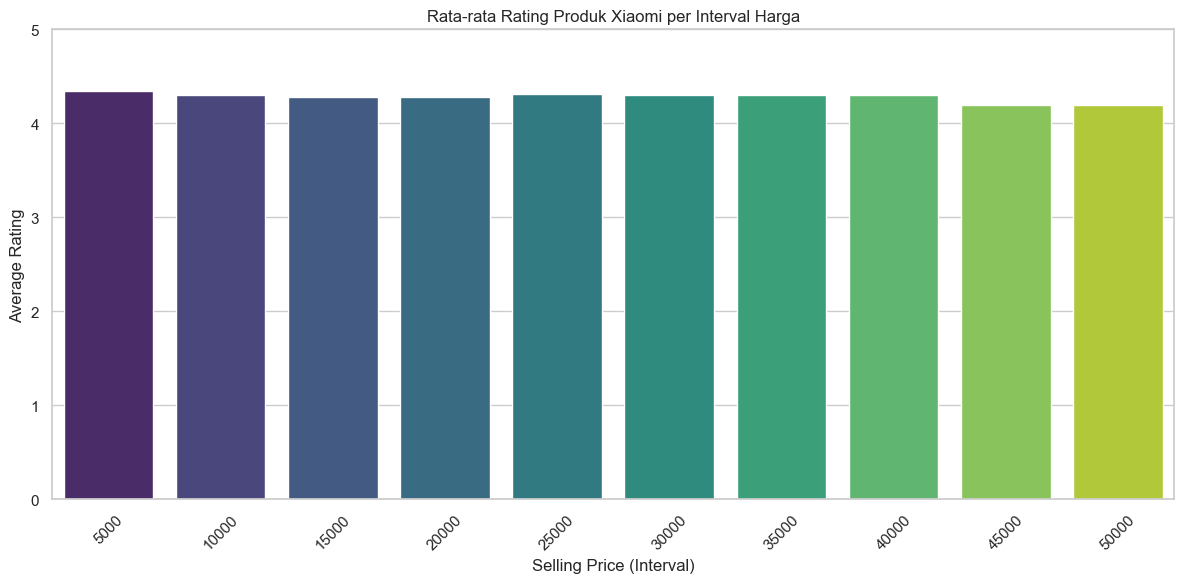

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("Sales.csv")

# Filter produk Xiaomi
df_xiaomi = df[df['Brands'].str.contains('Xiaomi', case=False, na=False)].copy()

# Buang data yang tidak lengkap
df_xiaomi = df_xiaomi[['Rating', 'Selling Price']].dropna()

# Buat interval harga per 5.000
interval = 5000
df_xiaomi['Price Bin'] = (df_xiaomi['Selling Price'] // interval) * interval

# Hitung rata-rata rating per bin harga
rating_by_price = df_xiaomi.groupby('Price Bin')['Rating'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_by_price, x='Price Bin', y='Rating', palette='viridis')

plt.title('Rata-rata Rating Produk Xiaomi per Interval Harga')
plt.xlabel('Selling Price (Interval)')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


C:\Users\71487\AppData\Local\Temp\ipykernel_28536\3092121766.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='viridis')


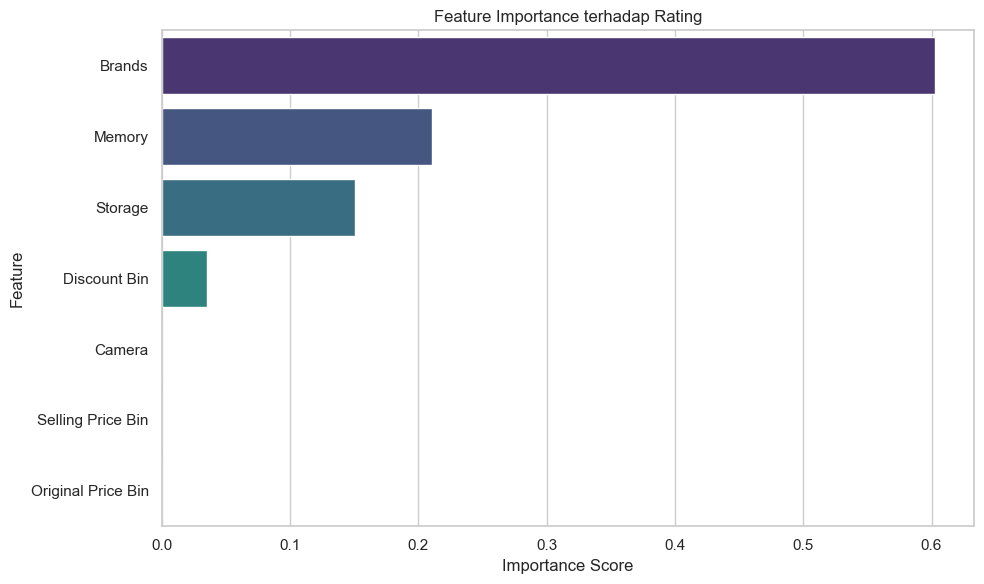

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("Sales.csv")  # Ganti dengan path lokal jika diperlukan

# Pilih kolom yang relevan
cols = ['Rating', 'Brands', 'Memory', 'Storage', 'Camera', 'Selling Price', 'Original Price', 'Discount']
df = df[cols].dropna()

# Konversi fitur numerik ke kategorik dengan binning
df['Selling Price Bin'] = pd.cut(df['Selling Price'], bins=[0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')],
                                 labels=['<1jt', '1-2jt', '2-3jt', '3-5jt', '5-10jt', '>10jt'])

df['Original Price Bin'] = pd.cut(df['Original Price'], bins=[0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')],
                                  labels=['<1jt', '1-2jt', '2-3jt', '3-5jt', '5-10jt', '>10jt'])

df['Discount Bin'] = pd.cut(df['Discount'], bins=[-1, 0, 10, 20, 30, 40, 50, 100],
                            labels=['0%', '1-10%', '11-20%', '21-30%', '31-40%', '41-50%', '>50%'])

# Label encoding untuk fitur kategorikal
categorical_cols = ['Brands', 'Memory', 'Storage', 'Camera',
                    'Selling Price Bin', 'Original Price Bin', 'Discount Bin']

df_encoded = df[categorical_cols].apply(LabelEncoder().fit_transform)
X = df_encoded
y = df['Rating']

# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importance terhadap Rating')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
